# Project 2: Wholesale Customer

#### by: Elmira Onagh



Citations: 

1. The codes used for formatting purposes are taken from the material covered in the lecture by Prof. Archit Garg

### Context: 
The data set refers to clients of a wholesale distributor. It includes the annual spending in
monetary units on diverse product categories.

Attribute Information from [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

1) **FRESH**: annual spending on fresh products (Continuous);
2) **MILK**: annual spending on milk products (Continuous);
3) **GROCERY**: annual spending on grocery products (Continuous);
4) **FROZEN**: annual spending on frozen products (Continuous)
5) **DETERGENTS_PAPER**: annual spending on detergents and paper products (Continuous)
6) **DELICATESSEN**: annual spending on and delicatessen products (Continuous);
7) **CHANNEL**: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) --> 1/2
8) **REGION**: customers Region  Lisbon, Oporto or Other (Nominal) -->1/2/3


### Goals
Goal of this project is to best describe the variation in the different types of customers that a
wholesale distributor interacts with.

## **Exploratory Data Analysis**

### Read in the data:

In [1]:
# Read in the data from the data folder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Exploring data

let's get the number of rows and columns in the data

In [2]:
data.shape

(440, 8)

We have 8 columns and 440 rows. Next let's check the data types:

In [3]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

We can see that all data are integer values (which is good, easier to process.) Meaning we only need to explore continuous data. in the next steps let's check more info on the data:

In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The number of example in the data set is 440 and from the `count` row we can see that none of the features are missing any instances. but we an double check it:

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

The mean of the Channel is 1.3 meaning that we have more businesses from group 1 (Horeca) than group 2 

we can also see that our target variable is nominal and binary (1/2) so let's transfer it to 0 and 1 instead so we can check the relationship with other features more easily in future. 

In [6]:
#so 1 becomes 0 and 2 becomes 1:
num = {1 : 0, 2 : 1}

data['Channel'] = data['Channel'].map(num)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
2,1,3,6353,8808,7684,2405,3516,7844
3,0,3,13265,1196,4221,6404,507,1788
4,1,3,22615,5410,7198,3915,1777,5185


Next let's see which one group has more example:

In [7]:
data['Channel'].value_counts()

0    298
1    142
Name: Channel, dtype: int64

we can see that group 0 has more instances than group two and makes 74.5 percent of the whole instances while group 1 makes 35.5% of the whole instances. from the [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) we can see that group 0 corresponds to Horeca and group 1 corresponds to retail. so we have 39% more instance for Horeca than for Retail. 


let's check the same thing for Region, the other nominal value

In [8]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

based on the website: group 1 corresponds to Lisbon, group 2 coresponds to Oporto and group 3 to others

Next, Let's look at the correlation matrix to see how the features correlate with the target variable and to each other:

In [9]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


So we are looking for a feature that has a high correlation with the target variable and low correlation with other features. by looking at the channel column we can see that the Detergetns_Paper has the highest correlation (63.6%) with the channel. After that comes Grocery with 60.9%, Milk with 46.1% and finally Frozen with a negative correlation of 20.2% and Fresh with a negative correlation 16.9%. 

For the Detergent_Paper we can see that we have a 92.5% correlation with Grocery, 66.2% with milk and negative correlation of 13.2% with Frozen and 10.2% with Fresh. So as the Customer expenditure on the detergents_paper increase their expenditure on grocery and milk also increases while their expenditure on Frozen and Fresh decreases. So Detergent_Paper has also strong correlation between features. 

Let's check the feature with second highest correlation with channel: Grocery. This feature has 72.8% correlation with Milk, 92.5% correlation with Detergent_Paper, and 20.5% with Delicassen. Meaning that as the expenditure on Grocery increases, the expenditure for milk and delicassen also increases which makes sense since both milk and delicassen can be considered grocery too. 

we can see that region has no strong correlation with any of the other features so we can drop it from our features. 


in the next step, let's see the unique values for each of the features:

In [10]:
for col in data.columns:
    print('{}: {} unique values'.format(col, data[col].nunique()))

Channel: 2 unique values
Region: 3 unique values
Fresh: 433 unique values
Milk: 421 unique values
Grocery: 430 unique values
Frozen: 426 unique values
Detergents_Paper: 417 unique values
Delicassen: 403 unique values


As expected, excluding Channel and Region, There rest of the features have many unique values. So we can group the channels by Region to see the relationship between them

In [11]:
# Check Channel by Region
data.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,0.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,0.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,0.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


we can see that 23.4% of the customers are from Lisbon, 40.4% are from Oporto, and 33.2% are from other regions. We can check the mean value of the other feature grouped by channel:

In [12]:
data.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
1,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


ignoring the Region (since it's nominal), We can see that Horeca on average spend more on Fresh and Frozen products than Retail while Retail spends more on the everything else. 

### Plotting Nominal data

plotting the Regions:

<Figure size 432x288 with 0 Axes>

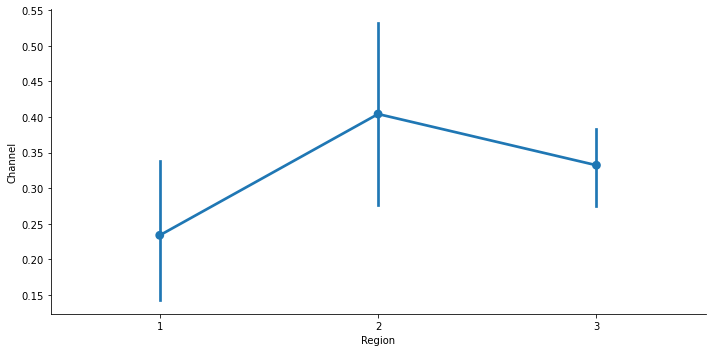

In [13]:
plt.figure(1)
sns.catplot(x='Region', y='Channel', data=data, kind='point', aspect=2, )

We can see that Region 2 (Oporto) has higher median than other two. Also the Region 1 and two, both have more variation in their data compared to region 3

### plotting continuous data

we use Histogram for the rest of the features:

C:\Users\elmir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


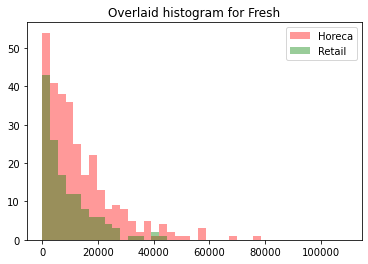

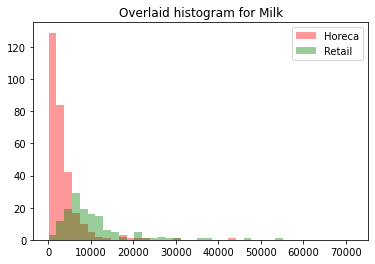

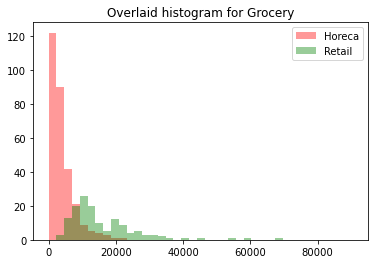

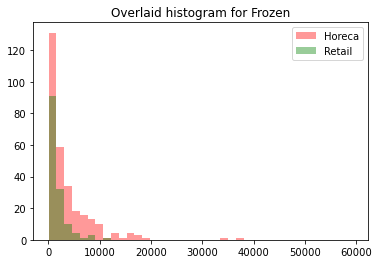

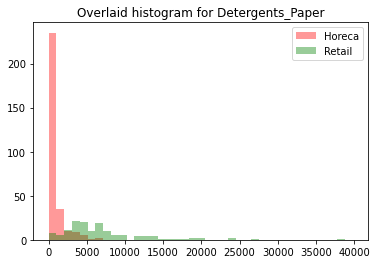

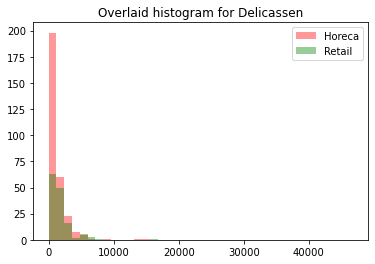

In [14]:
for i in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen' ]:
    horeca = list(data[data['Channel'] == 0][i].dropna())
    retail = list(data[data['Channel'] == 1][i].dropna())
    xmin = min(min(horeca), min(retail))
    xmax = max(max(horeca), max(retail))
    width = (xmax - xmin) / 40
    sns.distplot(horeca, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(retail, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Horeca', 'Retail'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

From the `Fresh` Graph we can see that the Horeca spends more on the Fresh products than Retail but keep in mind that we also have more cases of Horeca (39% more) than Retail. This is the same for the `Frozen` graph. The two customers spend similar amount for the `Delicassen` and Retail spends more for `Milk`, `Grocery`, and `Detergents_paper`. 

next we are going to plot all the feature using box plots.

<Figure size 432x288 with 0 Axes>

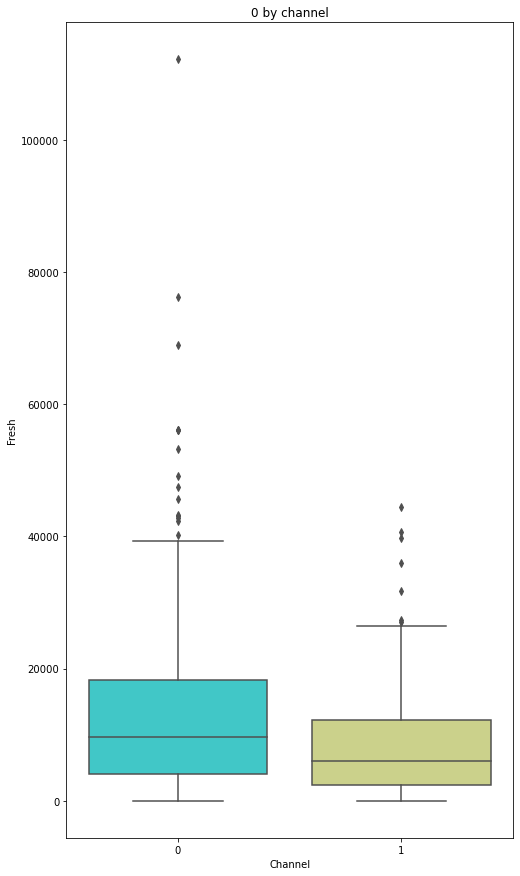

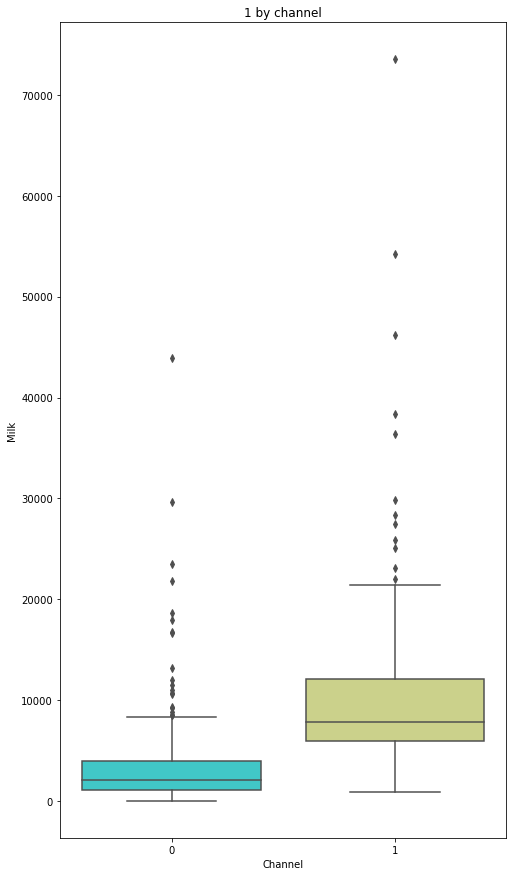

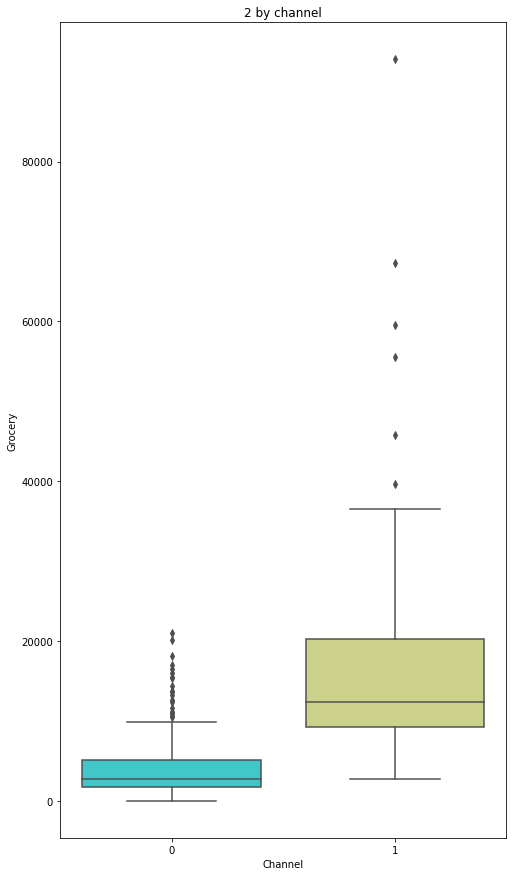

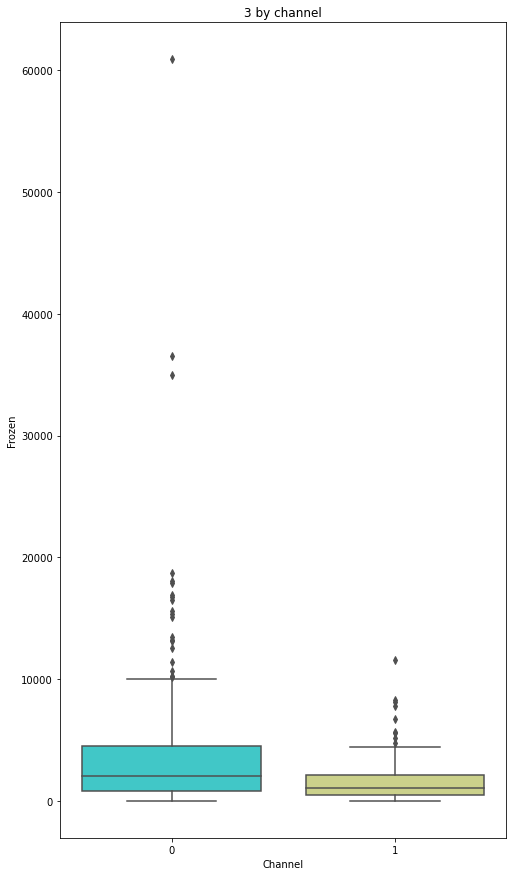

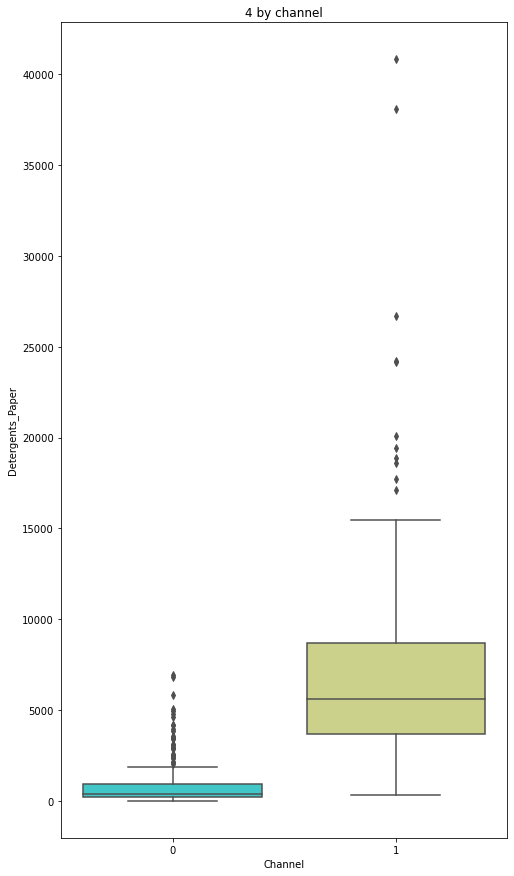

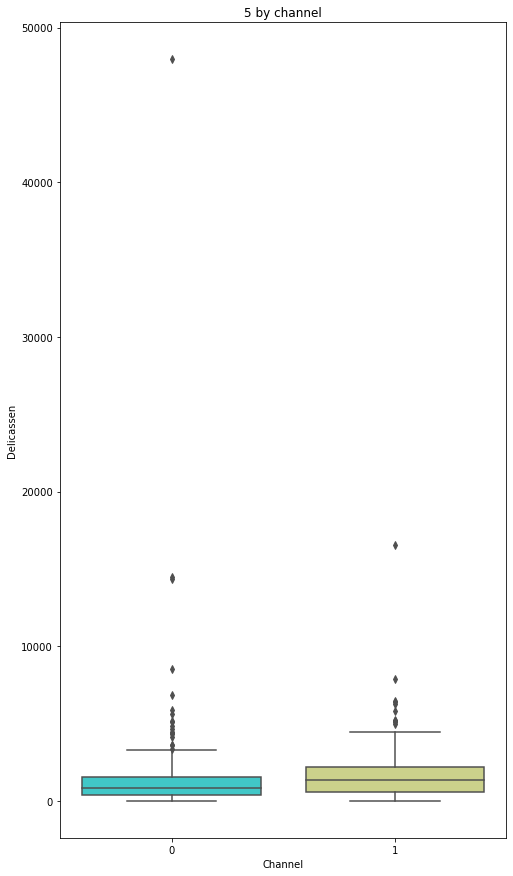

In [15]:
for i, col in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen' ]):
    plt.figure(i)
    plt.figure(figsize=(8,15))
    sns.boxplot(x='Channel',y=col ,data=data, palette='rainbow')
    plt.title("{} by channel".format(i))


From the boxplots we can see that for either store we have many outliers for each feature. To make sure that our model fits the data properly, we need to remove these outliers 

## **Data cleaning**

### Removing outliers

In [16]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,0.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,0.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,0.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,1.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,1.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


by looking at the max and min and values in between we can see that there are huge difference in them (They can also be observed in the box plot above.). let's look at the histogram to see if we need to remove any outliers:

C:\Users\elmir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


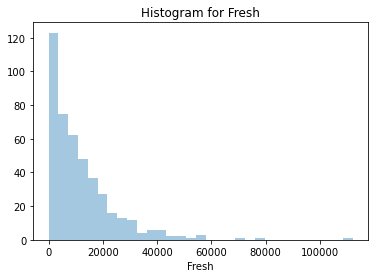

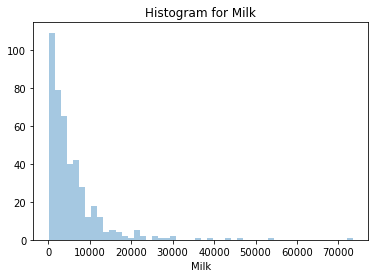

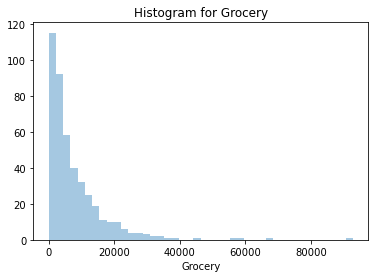

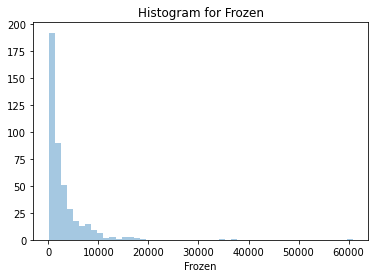

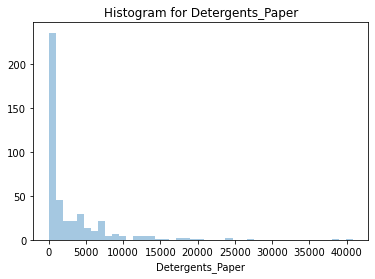

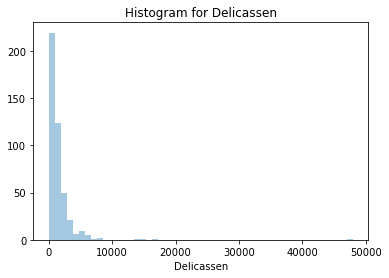

In [17]:
for feature in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    sns.distplot(data[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

We can see that all our data are skewed to right and have very long tail. by removing some outlier we might to be able to help to shape the data a little bit:

In [18]:
def detect_outlier(feature):
    outliers = []
    d = data[feature]
    mean = np.mean(d)
    std =np.std(d)
    
    
    for y in d:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(d.quantile(.95),
                                                             len([i for i in d
                                                                  if i > d.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(d.quantile(.99),
                                                           len([i for i in d
                                                                if i > d.quantile(.99)])))
                                                   
  

We can ignore the Region since it is a nominal variable and ranges from 1-3 and focus on the other features. 

In [19]:
# Determine what the upperbound should be for continuous features
for feat in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    detect_outlier(feat)


Outlier caps for Fresh:
  --95p: 36818.5 / 22 values exceed that
  --3sd: 49899.1 / 7 values exceed that
  --99p: 56082.6 / 5 values exceed that

Outlier caps for Milk:
  --95p: 16843.4 / 22 values exceed that
  --3sd: 27912.2 / 9 values exceed that
  --99p: 37610.1 / 5 values exceed that

Outlier caps for Grocery:
  --95p: 24033.5 / 22 values exceed that
  --3sd: 36428.4 / 7 values exceed that
  --99p: 43435.7 / 5 values exceed that

Outlier caps for Frozen:
  --95p: 9930.7 / 22 values exceed that
  --3sd: 17619.4 / 6 values exceed that
  --99p: 17964.8 / 5 values exceed that

Outlier caps for Detergents_Paper:
  --95p: 12043.2 / 22 values exceed that
  --3sd: 17168.8 / 10 values exceed that
  --99p: 22571.6 / 5 values exceed that

Outlier caps for Delicassen:
  --95p: 4485.4 / 22 values exceed that
  --3sd: 9975.6 / 4 values exceed that
  --99p: 8274.7 / 5 values exceed that


We can see that we definitely have some outliers in our data but fortunately they are not too extereme so we can can cap the 99 percentile to remove the influnce of the outlier in our future model:

In [20]:
# Cap features
def cap_features(feature):
    name = feature
    data[name].clip(upper=data[name].quantile(.99), inplace=True)


In [21]:
for feat in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    cap_features(feat)

In [22]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,2.543182,11797.643295,5641.214318,7715.149318,2891.643409,2787.916023,1387.448409
std,0.468052,0.774272,11556.065072,6382.145852,8103.786401,3537.152169,4203.651451,1470.885271
min,0.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,0.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,0.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,1.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,1.000000,3.000000,56082.610000,37610.060000,43435.740000,17964.820000,22571.610000,8274.660000


### removing `Region`

As we mentioned before, we can remove the `Region` since it has a very low correlation with other features:

In [23]:
data.drop(['Region'], axis=1, inplace=True)
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,1,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,1,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


### Transforming skewed data

in this step we explore and implement feature scaling to shorten the long tail of the skewed data and normalize it. first we plot the histogram for each continuous feature to see if any of them are skewed and need transformation:

In [24]:
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,1,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,1,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


C:\Users\elmir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


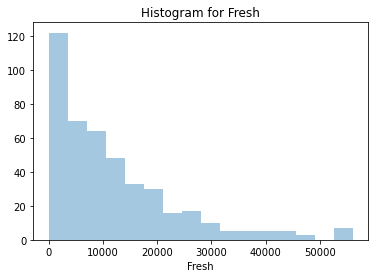

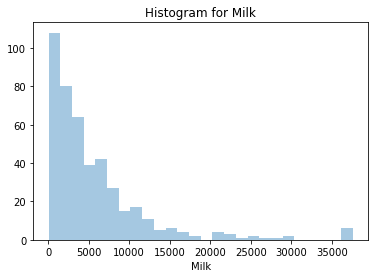

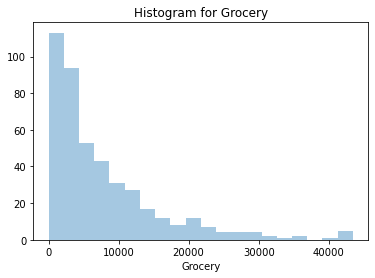

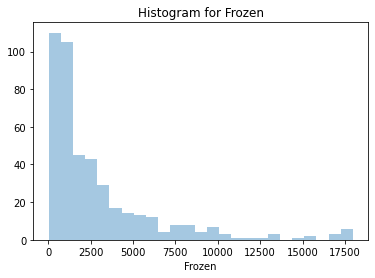

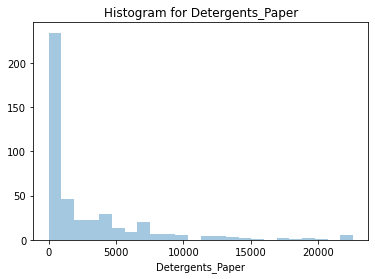

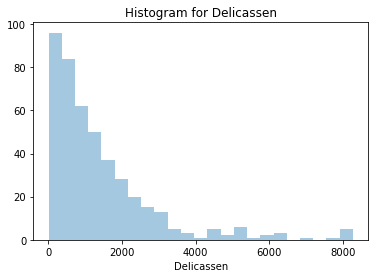

In [25]:
for feature in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    sns.distplot(data[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

We can see that the histogram for every continuous feature is skewed to right and have long tails. Capping outliers helped a little in shortening the tail but we need to do more transformations. for this purpose we use Box-Cox Power Transformation. 

#### QQ plotting for `Fresh`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

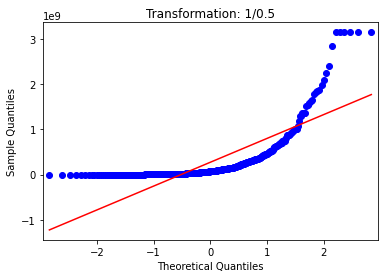

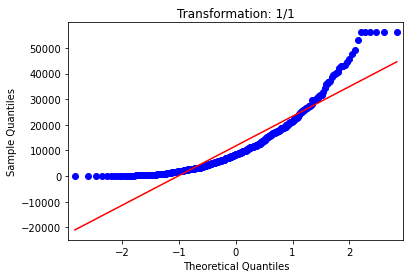

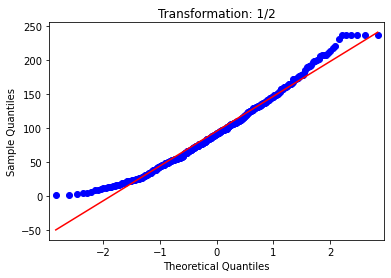

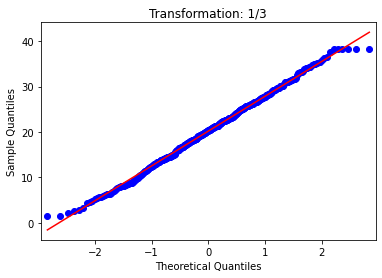

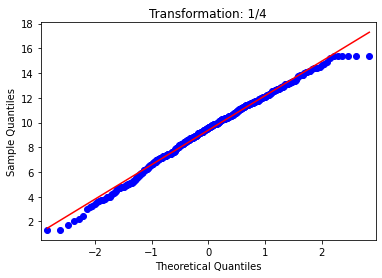

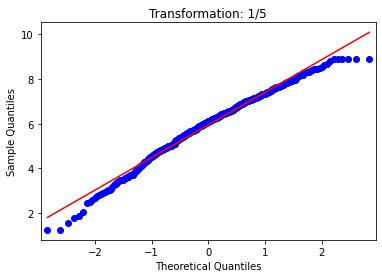

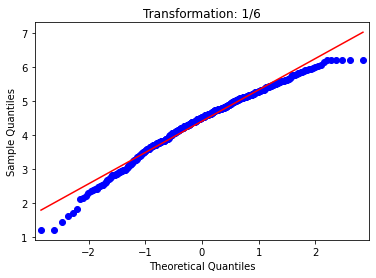

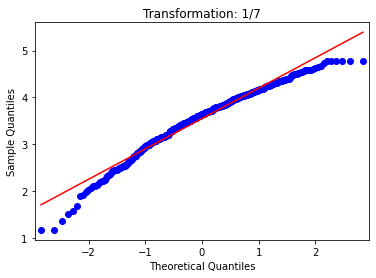

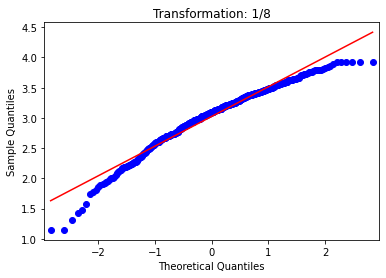

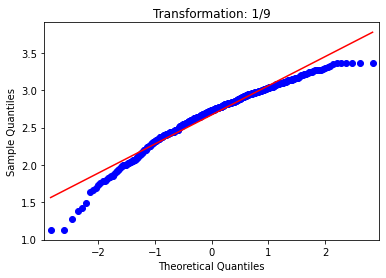

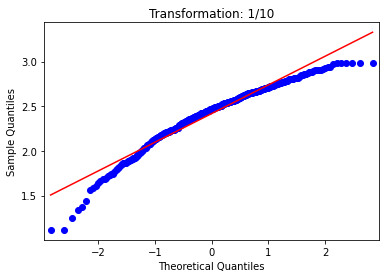

In [26]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

# Generate QQ plots for Fresh
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Fresh']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

We know that a perfect distribution is one where all of the points in the plot would end up in a straight line from the bottom left up to the top right. based on this definition, the prefect distribution for `Fresh` happens at 3 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

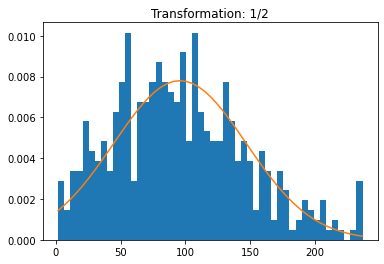

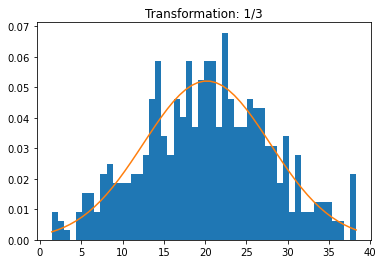

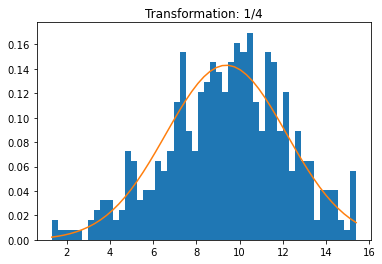

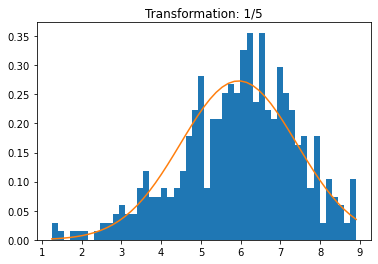

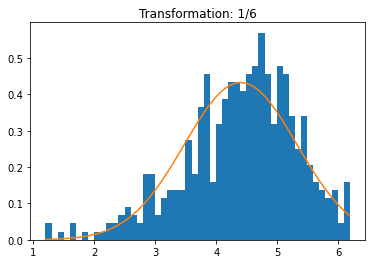

In [27]:
# Box-Cox transformation
for i in [2, 3, 4, 5, 6]:
    data_t = data['Fresh']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

we can see that at 3 the curve for the `Fresh` looks the most like the normal cureve so we can save this one:

In [28]:
data['Fresh'] = data['Fresh'].apply(lambda x: x**(1/3))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,9656.0,7561.0,214.0,2674.0,1338.0
1,1,19.181094,9810.0,9568.0,1762.0,3293.0,1776.0
2,1,18.520795,8808.0,7684.0,2405.0,3516.0,7844.0
3,0,23.672044,1196.0,4221.0,6404.0,507.0,1788.0
4,1,28.279097,5410.0,7198.0,3915.0,1777.0,5185.0


We continue doing this for all other continuous features. 

#### QQ plotting for `Milk`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

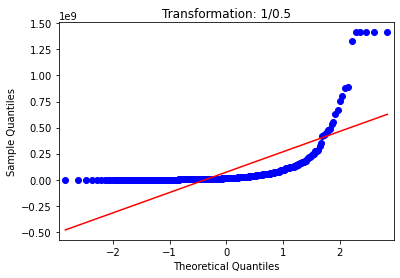

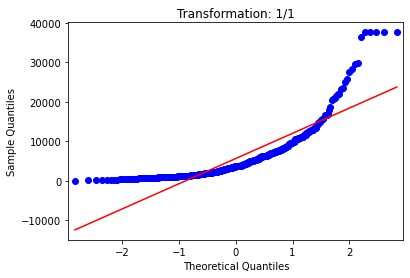

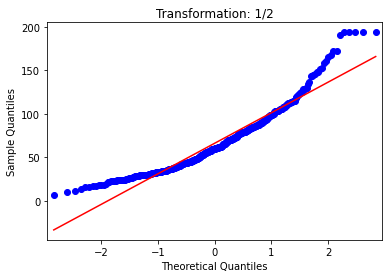

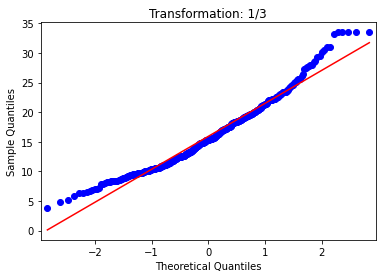

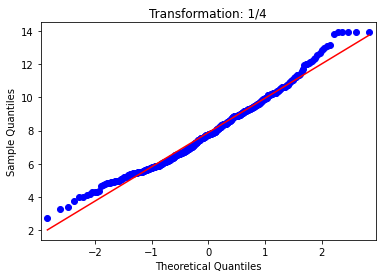

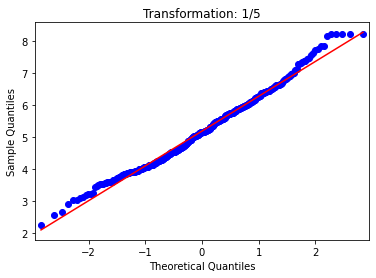

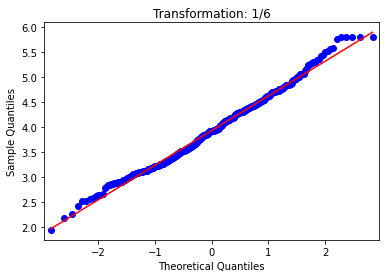

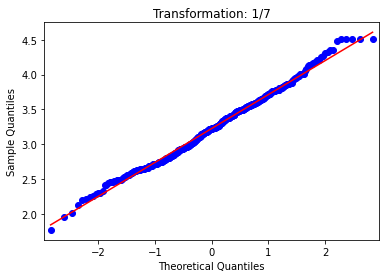

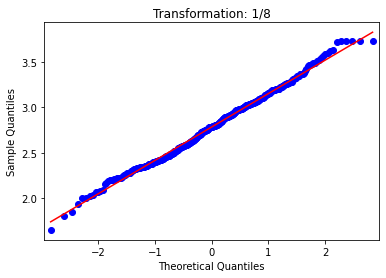

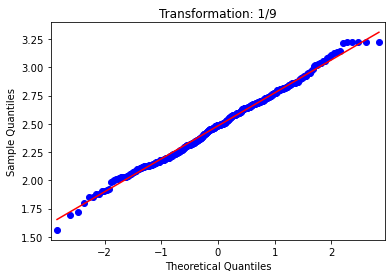

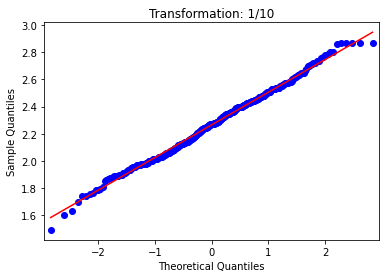

In [29]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

# Generate QQ plots for Milk
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Milk']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

around 6th transformation we seem to have the best transformation where the blue points are aligned more closely to the red line. 

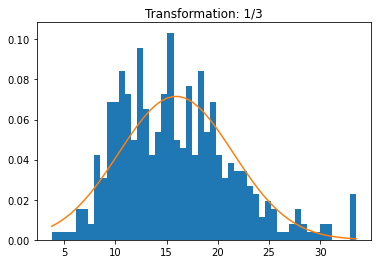

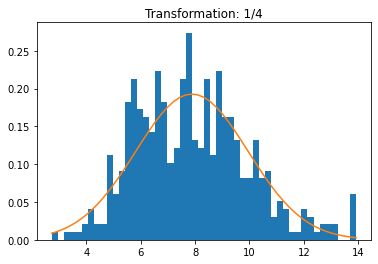

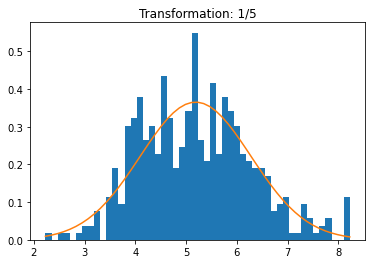

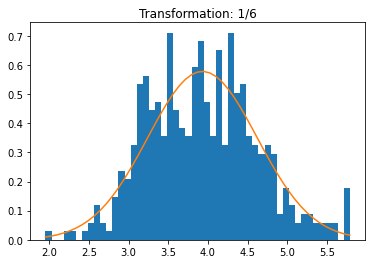

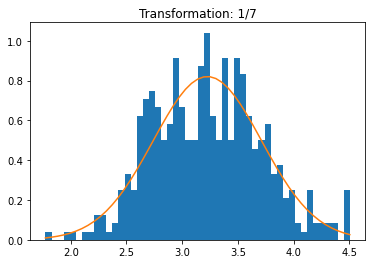

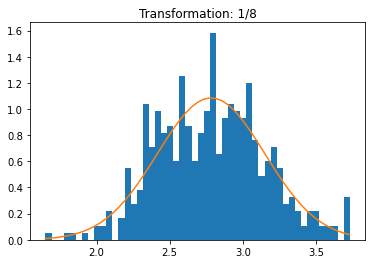

In [30]:
# Box-Cox transformation
for i in [3,4, 5, 6, 7, 8]:
    data_t = data['Milk']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

We can that after the 4th transformation the normal curve starts looking better and better and around 6th it is probably at its best. we save this transformation:

In [31]:
data['Milk'] = data['Milk'].apply(lambda x: x**(1/6))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,7561.0,214.0,2674.0,1338.0
1,1,19.181094,4.626773,9568.0,1762.0,3293.0,1776.0
2,1,18.520795,4.544431,7684.0,2405.0,3516.0,7844.0
3,0,23.672044,3.258031,4221.0,6404.0,507.0,1788.0
4,1,28.279097,4.189860,7198.0,3915.0,1777.0,5185.0


#### QQ Plotting `Grocery`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

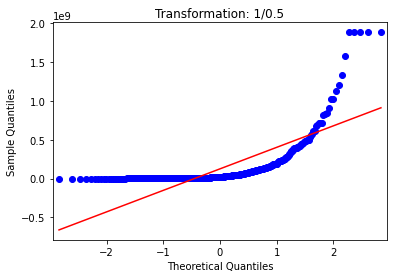

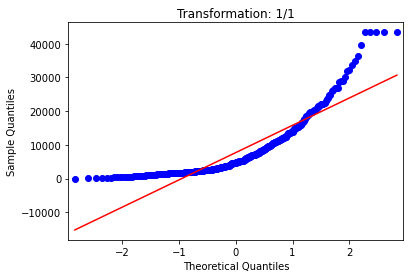

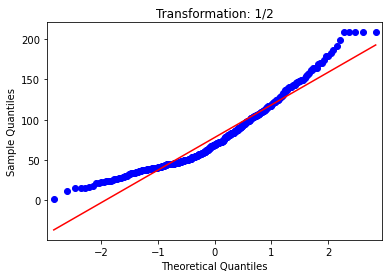

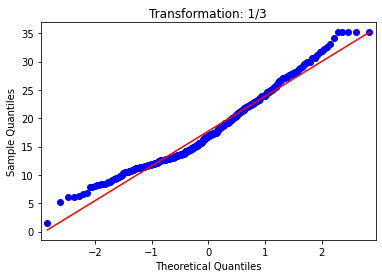

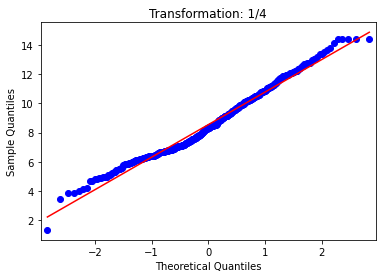

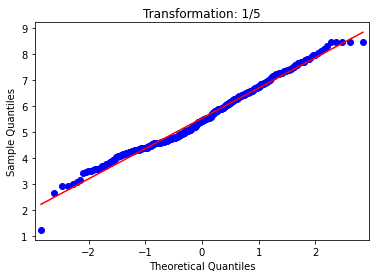

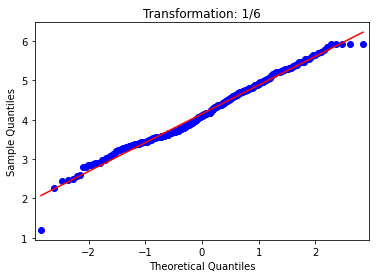

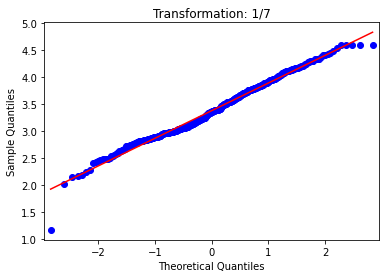

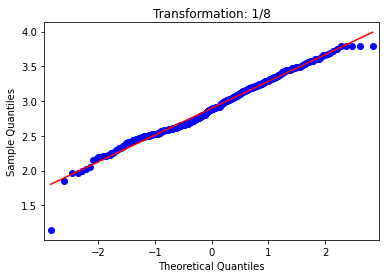

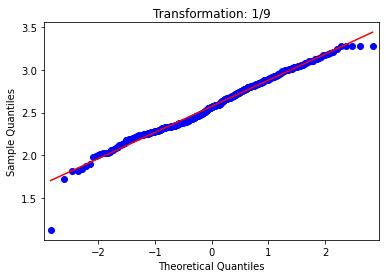

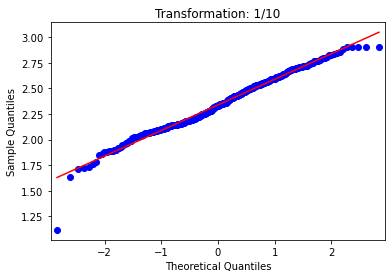

In [32]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

# Generate QQ plots for Grocery
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Grocery']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

We can see that the 1/5 is the best transformation for `Grocery`

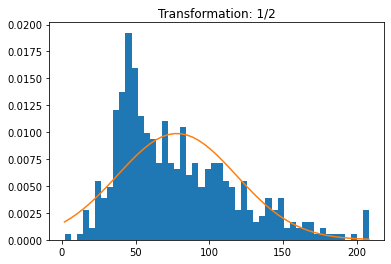

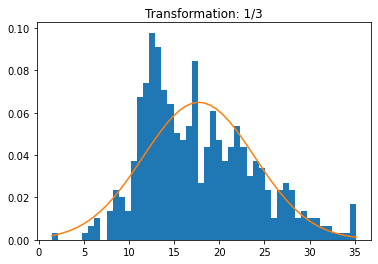

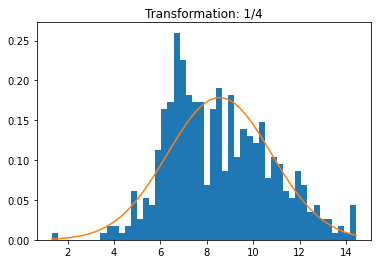

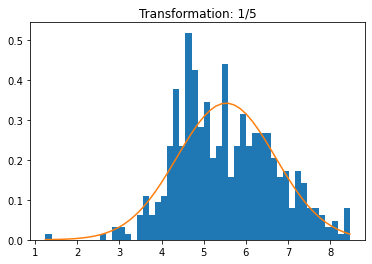

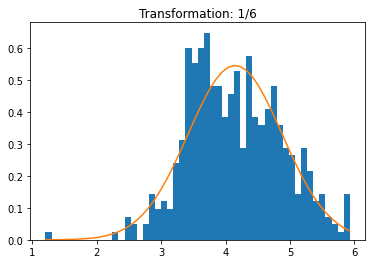

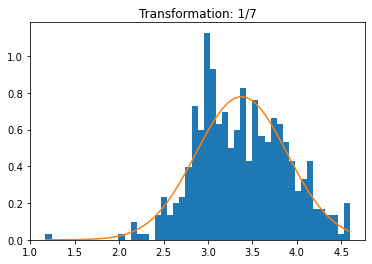

In [33]:
# Box-Cox transformation
for i in [2, 3, 4, 5, 6, 7]:
    data_t = data['Grocery']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

interestingly the 1/5 transformation seem to be slightly skewed to the left. instead 1/3 transofrmation seems to result in a better normal curve. So we can save this transformation:

In [34]:
data['Grocery'] = data['Grocery'].apply(lambda x: x**(1/3))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,19.627263,214.0,2674.0,1338.0
1,1,19.181094,4.626773,21.229530,1762.0,3293.0,1776.0
2,1,18.520795,4.544431,19.733121,2405.0,3516.0,7844.0
3,0,23.672044,3.258031,16.161132,6404.0,507.0,1788.0
4,1,28.279097,4.189860,19.308000,3915.0,1777.0,5185.0


#### QQ Plotting `Frozen`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

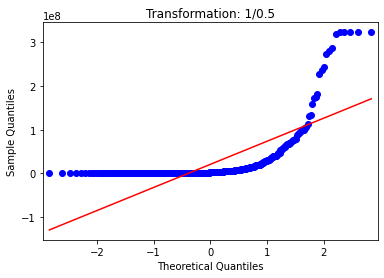

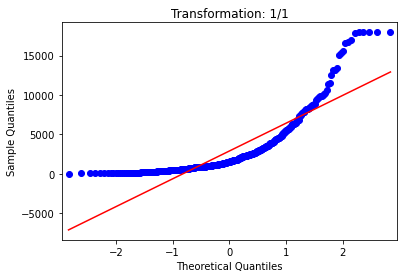

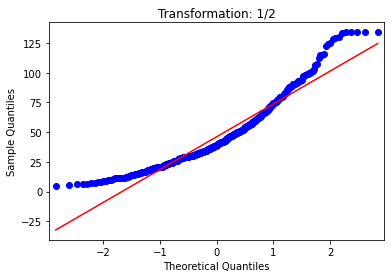

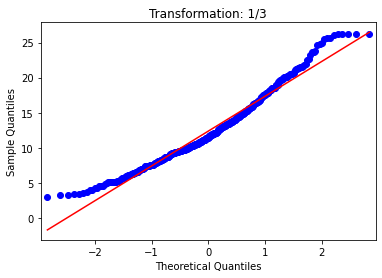

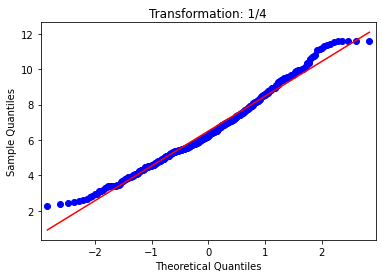

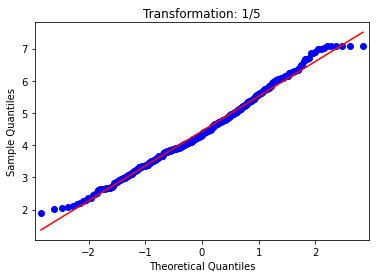

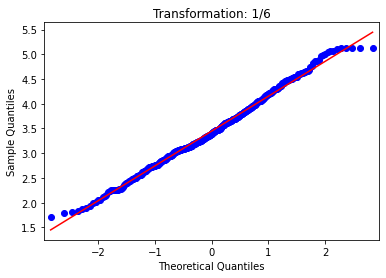

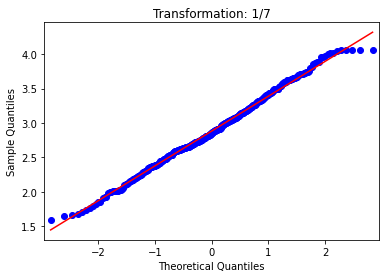

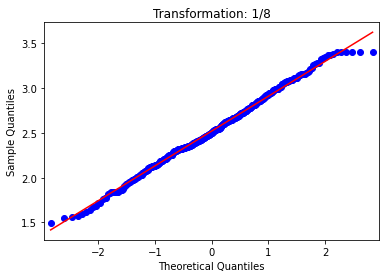

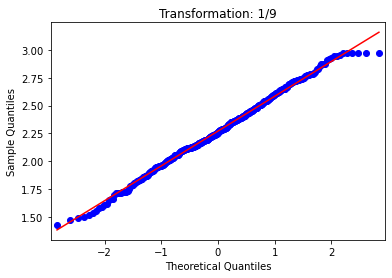

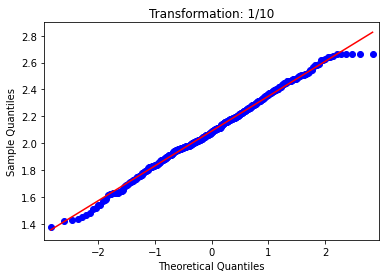

In [35]:
# Generate QQ plots for Frozen
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Frozen']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

1/6 or 1/7 seem to be the best transformation for `Frozen`

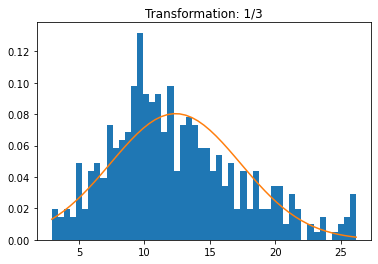

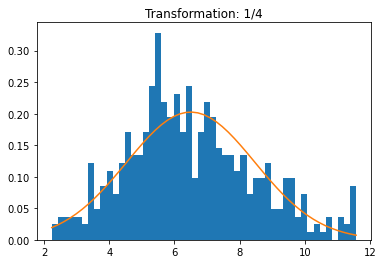

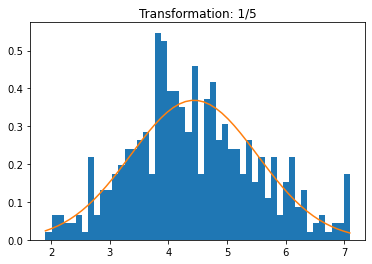

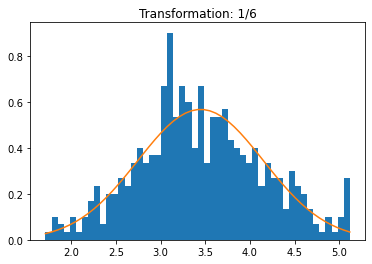

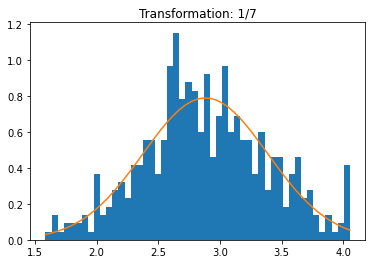

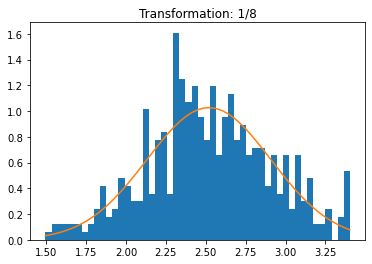

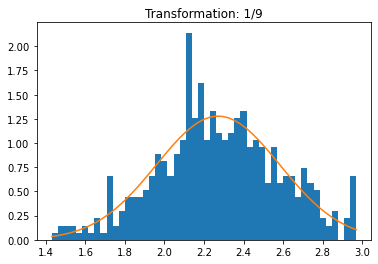

In [36]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7, 8,9]:
    data_t = data['Frozen']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

After 1/5 the normal curve doesnt improve as much, just to be safe we can save 1/6 which seems to be slightly better:

In [37]:
data['Frozen'] = data['Frozen'].apply(lambda x: x**(1/6))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,19.627263,2.445695,2674.0,1338.0
1,1,19.181094,4.626773,21.229530,3.475369,3293.0,1776.0
2,1,18.520795,4.544431,19.733121,3.660321,3516.0,7844.0
3,0,23.672044,3.258031,16.161132,4.309318,507.0,1788.0
4,1,28.279097,4.189860,19.308000,3.969983,1777.0,5185.0


#### QQ plotting for `Detergents_Paper`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

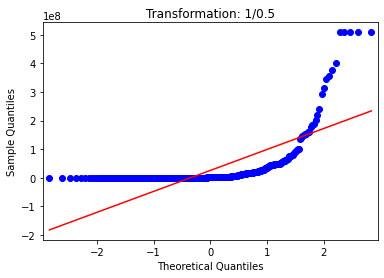

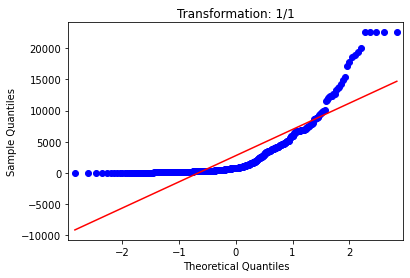

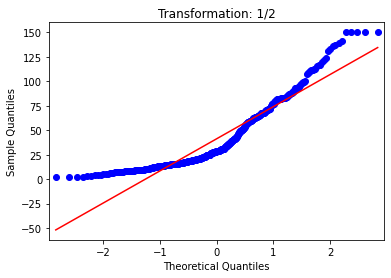

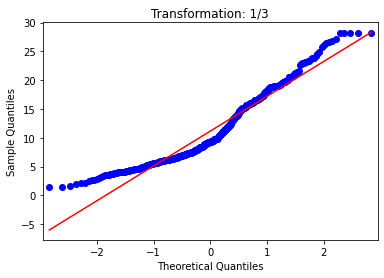

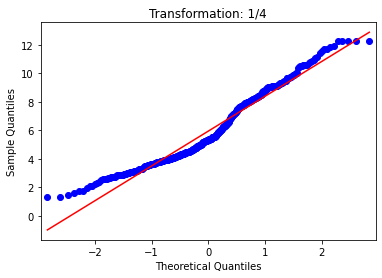

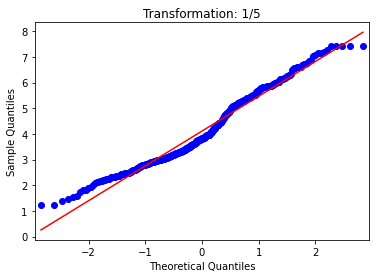

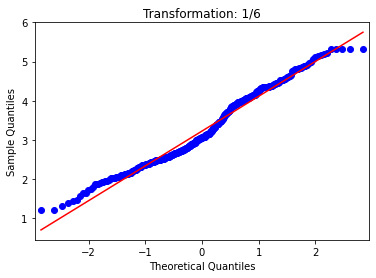

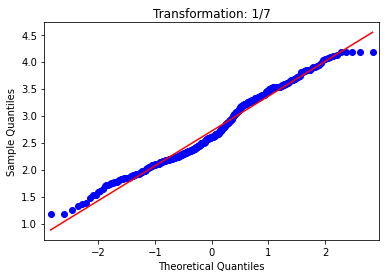

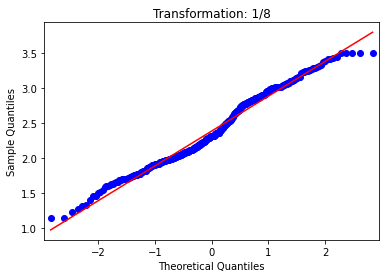

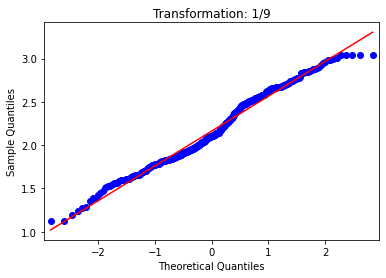

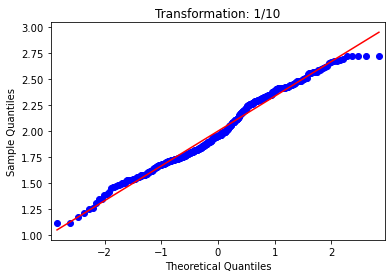

In [38]:
# Generate QQ plots for detergents_paper
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Detergents_Paper']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

in this case it is not very clear but it seems that 1/8 is the best transformation. we can look at the histograms to see which transformation makes a better normal curve:

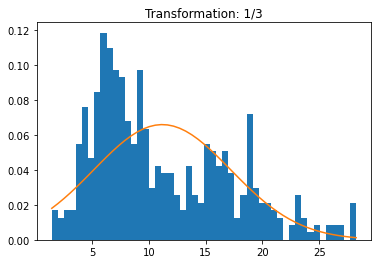

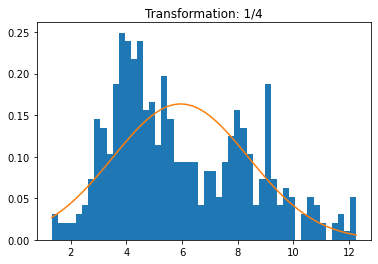

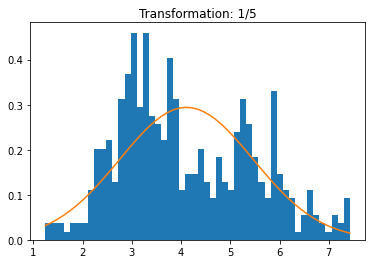

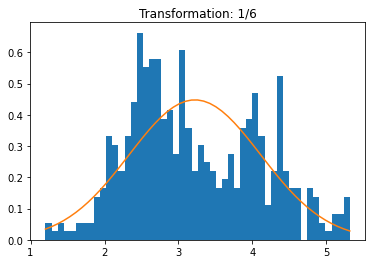

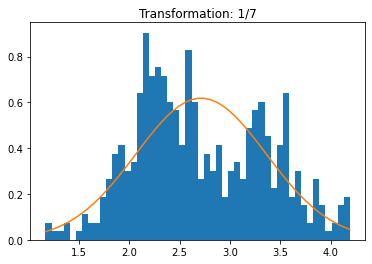

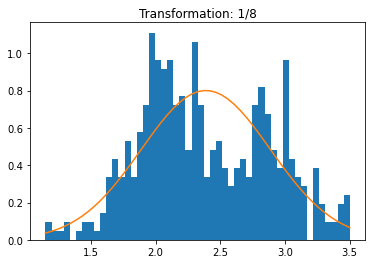

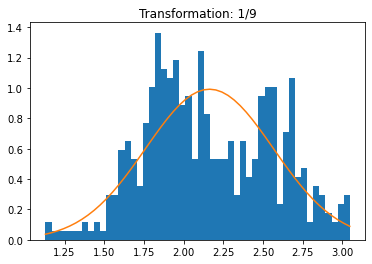

In [39]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7, 8,9]:
    data_t = data['Detergents_Paper']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [40]:
data['Detergents_Paper'] = data['Detergents_Paper'].apply(lambda x: x**(1/7))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,19.627263,2.445695,3.087411,1338.0
1,1,19.181094,4.626773,21.229530,3.475369,3.180630,1776.0
2,1,18.520795,4.544431,19.733121,3.660321,3.210542,7844.0
3,0,23.672044,3.258031,16.161132,4.309318,2.434612,1788.0
4,1,28.279097,4.189860,19.308000,3.969983,2.912333,5185.0


#### QQ Plotting for `Delicassen`

C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\elmir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

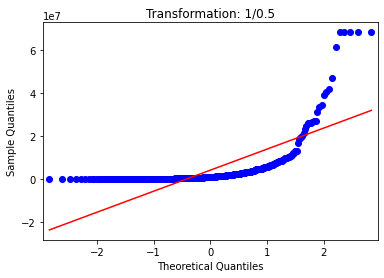

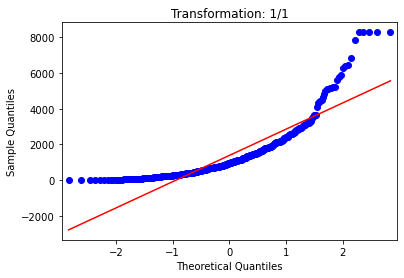

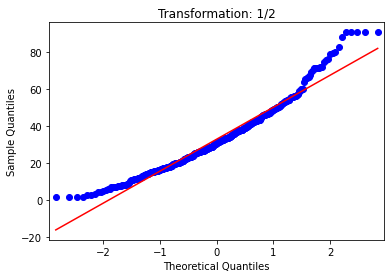

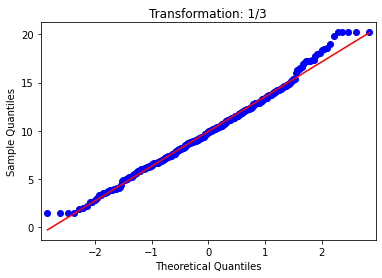

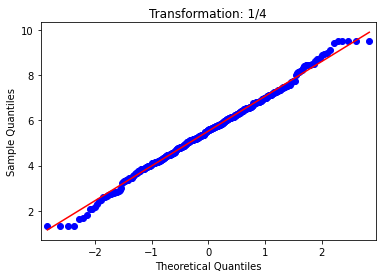

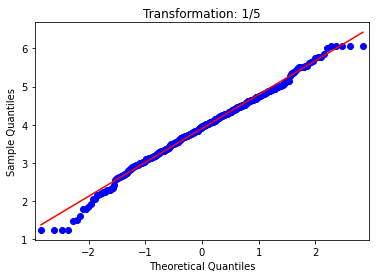

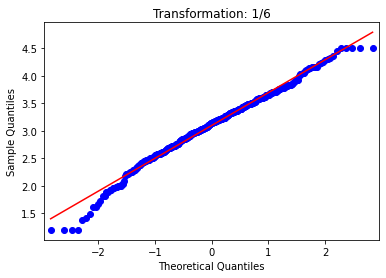

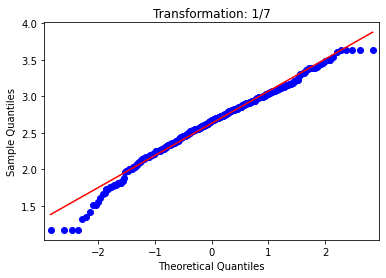

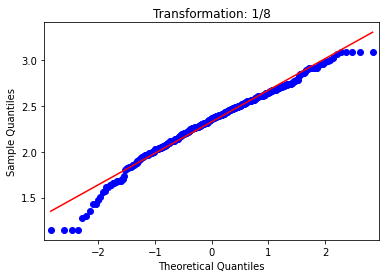

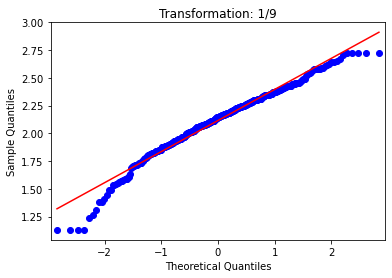

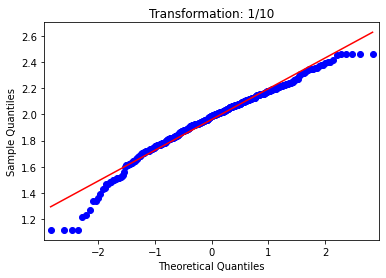

In [41]:
# Generate QQ plots for Delicassen
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Delicassen']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

around 1/3 seems to result in a good transformation:

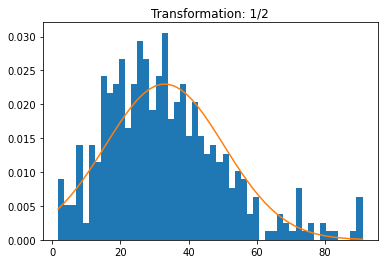

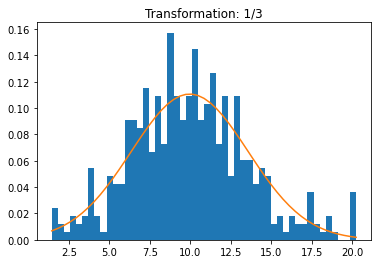

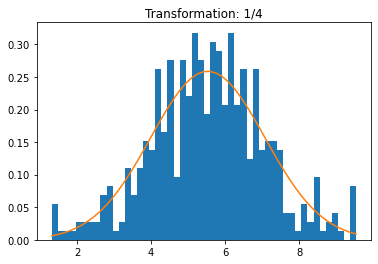

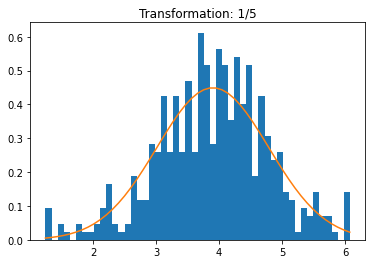

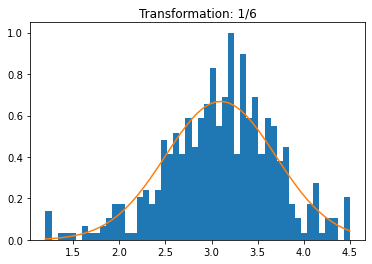

In [42]:
# Box-Cox transformation
for i in [2, 3, 4, 5, 6]:
    data_t = data['Delicassen']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

based on histogram we can see that 1/4 is in fact a better transformation:

In [43]:
data['Delicassen'] = data['Delicassen'].apply(lambda x: x**(1/4))
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,19.627263,2.445695,3.087411,6.048031
1,1,19.181094,4.626773,21.229530,3.475369,3.180630,6.491734
2,1,18.520795,4.544431,19.733121,3.660321,3.210542,9.410970
3,0,23.672044,3.258031,16.161132,4.309318,2.434612,6.502672
4,1,28.279097,4.189860,19.308000,3.969983,2.912333,8.485691


In [44]:
data.to_csv('Wholesale customers data_cleaned.csv', index=False)

## **Splitting data**

### Read cleaned data

In [45]:
data = pd.read_csv('Wholesale customers data_cleaned.csv')
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,23.312067,4.614587,19.627263,2.445695,3.087411,6.048031
1,1,19.181094,4.626773,21.229530,3.475369,3.180630,6.491734
2,1,18.520795,4.544431,19.733121,3.660321,3.210542,9.410970
3,0,23.672044,3.258031,16.161132,4.309318,2.434612,6.502672
4,1,28.279097,4.189860,19.308000,3.969983,2.912333,8.485691


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
features = data.drop('Channel', axis=1)
labels = data['Channel']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [47]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [48]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## **Feature Scaling to Normalize the data**

In [49]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

In [50]:
from sklearn.preprocessing import StandardScaler

data_train = X_train
data_val = X_val
data_test = X_test
data_train.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
211,22.969714,5.521167,34.112087,4.097968,4.098029,7.319316
209,17.705071,4.832061,25.594803,3.086164,3.844807,5.313303
6,22.974136,3.838566,19.106512,2.798166,3.159085,4.831691
317,10.573185,3.816040,18.285569,3.150575,2.608163,6.360806
358,9.121801,5.150319,11.840481,4.276163,2.454035,8.001952


In [51]:
pd.DataFrame(data_train).describe().head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,264.00000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,19.96299,3.932252,17.896685,3.429129,2.742128,5.510784
std,7.83449,0.711981,6.284689,0.699611,0.665422,1.571623


We can see that we have 264 data in our traning set

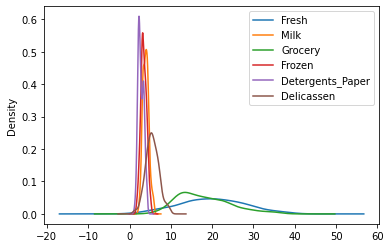

In [52]:
pd.DataFrame(data_train).plot(kind='kde');

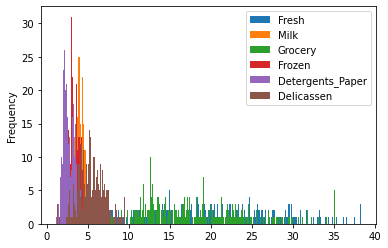

In [53]:
pd.DataFrame(data_train).plot(kind='hist', bins=300);

we can see that our data does follow a normal distribution to some extent but some features are skewed to right. in the following sections we can compare standard scaling and min-max scaling to chose one of the method to scale our data

### Standard scaler effect

In [54]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(data_train)
scaled1[:5]

array([[ 0.38450938,  2.23592223,  2.58504421,  0.9578317 ,  2.04152623,
         1.15292732],
       [-0.28874996,  1.26621164,  1.22722671, -0.49115351,  1.66025903,
        -0.12589293],
       [ 0.38507483, -0.13183426,  0.19286937, -0.90358858,  0.62779635,
        -0.43291767],
       [-1.20079808, -0.16353365,  0.06199544, -0.39891151, -0.20170524,
         0.54188375],
       [-1.38640565,  1.71406475, -0.96547441,  1.21302027, -0.43377016,
         1.58810392]])

In [55]:
pd.DataFrame(scaled1).describe().head()

,0,1,2,3,4,5
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.097607e-16,7.308968e-16,-4.375709e-16,3.107783e-16,-1.026115e-16,-2.979519e-16
std,1.001899e+00,1.001899e+00,1.001899e+00,1.001899e+00,1.001899e+00,1.001899e+00
min,-2.368491e+00,-2.443937e+00,-1.886335e+00,-2.461964e+00,-2.367193e+00,-2.674101e+00
25%,-6.991570e-01,-7.993586e-01,-8.050468e-01,-6.383313e-01,-8.072067e-01,-6.710828e-01


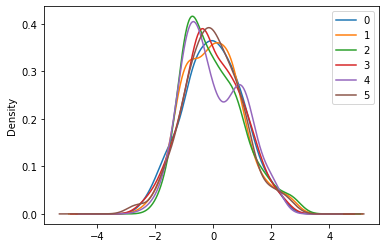

In [56]:
pd.DataFrame(scaled1).plot(kind='kde');

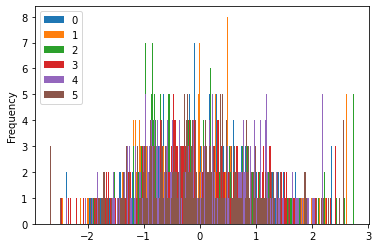

In [57]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

we can see that standard scaling does scale our data nicely and the curve look more like a normal curve 

### MinMaxScaler effect

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaled2 = MinMaxScaler().fit_transform(data_train)
scaled2[:5]

array([[0.5844268 , 0.92564859, 0.96425184, 0.70076931, 0.97040382,
        0.73018886],
       [0.44150244, 0.73384556, 0.67143886, 0.40384973, 0.88648304,
        0.48619267],
       [0.58454683, 0.45732034, 0.44837997, 0.31933537, 0.65922755,
        0.427613  ],
       [0.24788628, 0.45105038, 0.42015705, 0.42275154, 0.47664584,
        0.61360304],
       [0.20848417, 0.82242826, 0.19858344, 0.75306141, 0.425566  ,
        0.81321963]])

In [59]:
pd.DataFrame(scaled2).describe()

,0,1,2,3,4,5
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.502800,0.483396,0.406788,0.504495,0.521043,0.510213
std,0.212690,0.198170,0.216059,0.205305,0.220528,0.191160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354378,0.325288,0.233180,0.373691,0.343369,0.382172
50%,0.500241,0.479739,0.369648,0.483127,0.477471,0.493566
75%,0.656844,0.609457,0.549842,0.653901,0.703253,0.635000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


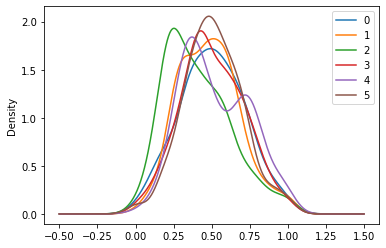

In [60]:
pd.DataFrame(scaled2).plot(kind='kde');

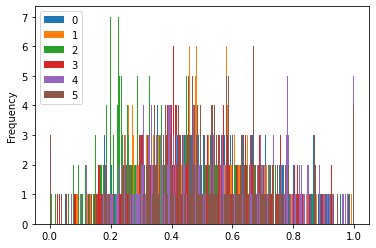

In [61]:
pd.DataFrame(scaled2).plot(kind='hist', bins=300);

### Conclusions 

by looking at the kde/hist graphs we can see that for our continuous features we can see that the standard scaling does a better job in normalizing our data. Specially since we dont have a specific range for the data, normalizing them around their mean is a better idea than distributing them in a specific range. 

In [62]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [63]:
# Scale the training, test, and validation sets
features = data_train.columns

data_train[features] = scaler.transform(data_train[features])
data_val[features] = scaler.transform(data_val[features])
data_test[features] = scaler.transform(data_test[features])

data_train.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
211,0.384509,2.235922,2.585044,0.957832,2.041526,1.152927
209,-0.288750,1.266212,1.227227,-0.491154,1.660259,-0.125893
6,0.385075,-0.131834,0.192869,-0.903589,0.627796,-0.432918
317,-1.200798,-0.163534,0.061995,-0.398912,-0.201705,0.541884
358,-1.386406,1.714065,-0.965474,1.213020,-0.433770,1.588104


In [64]:
#write out dataset:
data_train.to_csv('train_features.csv', index=False)
data_val.to_csv('val_features.csv', index=False)
data_test.to_csv('test_features.csv', index=False)


## **RFECV**

Since we are planning to use XGBoost, by using RFECV we can find the optimal number of featture:

In [65]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

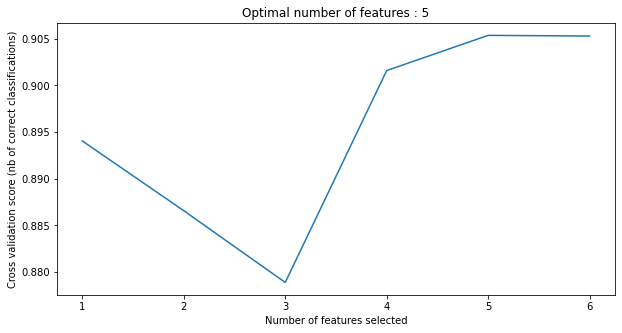

In [66]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import xgboost as xgb


model = xgb.XGBClassifier(eval_metric='rmse')
rfecv = RFECV(estimator=model)
rfecv.fit(tr_features, tr_labels)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

based on the graph above, for the XGBoost model, the best number of features is 5. we can also try it with a different model:

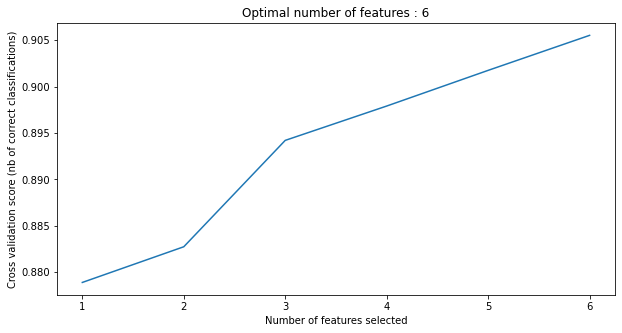

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(tr_features, tr_labels)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

Now if we decide to use random forest classifier then the optimal number of the features will be 6. 

## **K-Mean**

### Elbow method:

In [68]:
from sklearn.cluster import KMeans  # line used to import k-mean cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

tr_features = pd.read_csv('train_features.csv')
tr_label = pd.read_csv('train_labels.csv')

X=tr_features.iloc[:, [0, 1, 2, 3, 4, 5]].values
X[0:10]


array([[ 0.38450938,  2.23592223,  2.58504421,  0.9578317 ,  2.04152623,
         1.15292732],
       [-0.28874996,  1.26621164,  1.22722671, -0.49115351,  1.66025903,
        -0.12589293],
       [ 0.38507483, -0.13183426,  0.19286937, -0.90358858,  0.62779635,
        -0.43291767],
       [-1.20079808, -0.16353365,  0.06199544, -0.39891151, -0.20170524,
         0.54188375],
       [-1.38640565,  1.71406475, -0.96547441,  1.21302027, -0.43377016,
         1.58810392],
       [-0.7374733 ,  0.55652756,  0.53720414, -0.43659666,  0.79586453,
         0.56946811],
       [ 0.68455843, -0.61420643, -0.92648648, -0.50058173, -0.99280978,
         0.13039501],
       [ 0.43533332,  0.66865072, -0.21470411,  0.06150135, -1.81883715,
         1.05259647],
       [-0.63638957,  0.36123478,  0.89290229,  0.8862943 ,  1.0859298 ,
         0.60658065],
       [ 0.36736186,  0.76665499,  1.4631635 , -0.33151002,  1.13405702,
        -0.2363669 ]])

In [69]:
y = tr_label.iloc[:, [0]].values
y[0:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [70]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

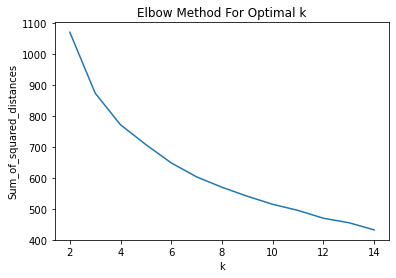

In [71]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the graph above, we can see that the optimum number of clusters is 4.

### K-mean implementation

In [72]:
kmeans = KMeans(n_clusters=4, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

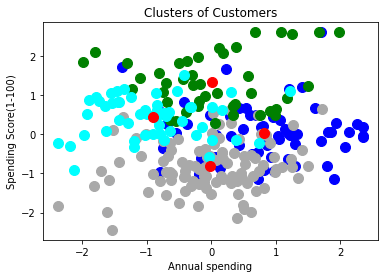

In [73]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43       174
           1       0.02      0.02      0.02        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.20       264
   macro avg       0.21      0.08      0.11       264
weighted avg       0.55      0.20      0.29       264



Precision is measure of models relevancy and recall is measure of model's completeness. What we want is a high precision and high recall model so we can have highly accurate model results. 

label = 0 --> 82% of the retrieved instances are relevant. 

label = 1 --> precision 2% indicates that 2% of the retrieved instances were relevant. 

over all the accuracy of the method is 20% 

Since the accuracy is so low we can try other k value:

In [75]:
#k = 3
kmeans = KMeans(n_clusters=3, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78       174
           1       0.88      0.81      0.84        90
           2       0.00      0.00      0.00         0

    accuracy                           0.71       264
   macro avg       0.62      0.49      0.54       264
weighted avg       0.94      0.71      0.80       264



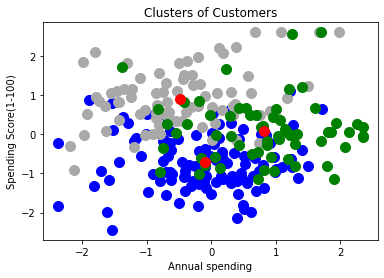

In [77]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


We can see that having three clusters results in a model with higher accuracy. next we can test these two models on validation and testing sets

### evaluating on validation set

In [78]:
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

val_features = pd.read_csv('val_features.csv')
val_label = pd.read_csv('val_labels.csv')

X=val_features.iloc[:, [0, 1, 2, 3, 4, 5]].values

X[0:10]


array([[-1.46129697e+00, -2.78926238e+00, -2.03124586e+00,
        -1.96990532e+00, -2.14053357e+00, -2.44095745e+00],
       [ 1.40869564e+00,  2.43299237e-01,  2.43128731e-01,
         1.21568831e+00, -6.36624606e-01,  1.43977665e-01],
       [ 1.71582490e-01, -4.28278024e-01, -8.07704400e-01,
        -8.49772594e-01, -5.82544683e-01, -7.61661289e-01],
       [-1.75490733e+00,  1.28478098e+00,  4.44699908e-01,
        -5.48390901e-01,  7.79000575e-01, -1.08342433e+00],
       [ 4.03534151e-01,  4.71088759e-01,  4.49040556e-01,
        -1.02029089e+00,  1.01585470e-01,  1.12172574e+00],
       [ 7.17869757e-01,  5.47587708e-02,  3.34511152e-01,
        -6.55795388e-01,  4.40696337e-01, -8.31471070e-02],
       [ 3.49679636e-01, -4.14562580e-01, -6.77088823e-01,
         1.16726896e+00, -7.71513505e-01,  3.92652678e-01],
       [ 7.56255527e-01, -3.93786367e-01, -5.94946311e-01,
        -2.76097619e-01, -6.50610632e-01,  2.60601488e-03],
       [-1.07778935e-01,  4.47400885e-02, -5.966

In [79]:
y = val_label.iloc[:, [0]].values
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

#### k=4

In [80]:
kmeans = KMeans(n_clusters=4, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

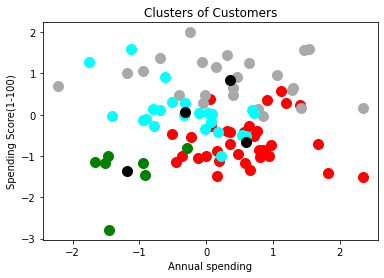

In [81]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [82]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66        66
           1       0.62      0.68      0.65        22
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.55        88
   macro avg       0.40      0.30      0.33        88
weighted avg       0.88      0.55      0.66        88



we can see that during the validation, the accuracy of the model from 20% increased to 55%.

#### k=3

In [83]:
kmeans = KMeans(n_clusters=3, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

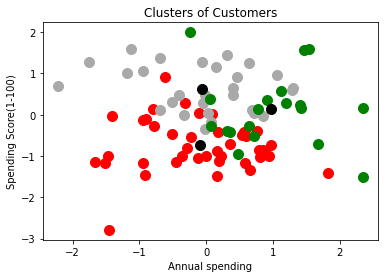

In [84]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        66
           1       0.75      0.95      0.84        22
           2       0.00      0.00      0.00         0

    accuracy                           0.70        88
   macro avg       0.58      0.53      0.54        88
weighted avg       0.94      0.70      0.78        88



for the k = 3 the accuracy score drop by 1% but it is still higher than k=4. 

### Evaluate model on test set

In [86]:
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

te_features = pd.read_csv('test_features.csv')
te_label = pd.read_csv('test_labels.csv')

X=te_features.iloc[:, [0, 1, 2, 3, 4, 5]].values
X[0:10]


array([[ 0.3059982 , -0.34206306, -0.4665198 , -0.05643176, -0.71178461,
        -1.05235897],
       [ 0.32565072, -1.4512408 , -0.97385032,  0.62793924, -1.3718203 ,
        -0.73624575],
       [-0.6908765 ,  0.77017058,  0.37234015, -0.6840923 , -0.2738984 ,
        -1.95155557],
       [-0.06503772, -1.60275137, -1.51978008, -0.3013124 , -1.3550075 ,
        -1.06915674],
       [ 0.14722895,  0.79323317, -0.10433627, -0.67878036,  0.2625894 ,
         0.42143883],
       [-0.24525899,  0.49098482, -0.57109756, -0.51272893, -0.62431829,
         1.70182088],
       [-1.07709477,  0.01265318,  0.01745404,  0.11087164,  0.67831093,
        -0.1163708 ],
       [ 1.39965792,  0.75460173,  1.24330568, -0.97334109, -0.63386733,
         0.38011849],
       [ 1.03252237,  0.80909255,  2.35127994, -2.2408015 ,  1.67157858,
         1.68778961],
       [-1.85723044,  0.68684947,  1.79421739, -0.73234064,  1.61688083,
         0.9535416 ]])

In [87]:
y = val_label.iloc[:, [0]].values
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

#### k=4

In [88]:
kmeans = KMeans(n_clusters=4, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

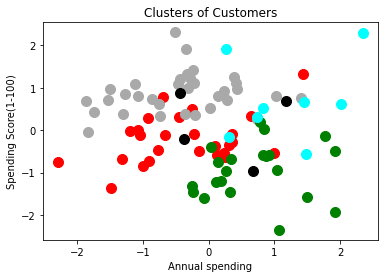

In [89]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       0.77      0.30      0.43        66
           1       0.18      0.27      0.22        22
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.30        88
   macro avg       0.24      0.14      0.16        88
weighted avg       0.62      0.30      0.38        88



for k = 4, the testing score dropped from 55% to 30%

#### k = 3

In [91]:
kmeans = KMeans(n_clusters=3, random_state=5 )
y_kmeans = kmeans.fit_predict(X)

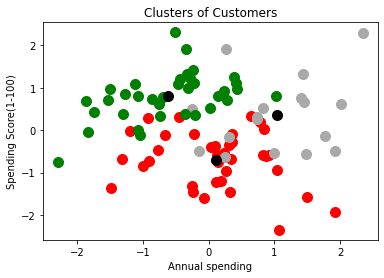

In [92]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='darkgray', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual spending')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [93]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        66
           1       0.24      0.18      0.21        22
           2       0.00      0.00      0.00         0

    accuracy                           0.33        88
   macro avg       0.31      0.19      0.23        88
weighted avg       0.58      0.33      0.42        88



We can see that the score for the k = 3 also dropped significantly. indicating that k= 4 was probably good number of clusters. 

## **PCA**

Implement PCA with number of original features to answer how much variance is explained by
first 2 components and by first 4 components and visualize the clusters in the data

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams
import sklearn
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [95]:
tr_features = pd.read_csv('train_features.csv')
tr_label = pd.read_csv('train_labels.csv')

tr_features.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.384509,2.235922,2.585044,0.957832,2.041526,1.152927
1,-0.288750,1.266212,1.227227,-0.491154,1.660259,-0.125893
2,0.385075,-0.131834,0.192869,-0.903589,0.627796,-0.432918
3,-1.200798,-0.163534,0.061995,-0.398912,-0.201705,0.541884
4,-1.386406,1.714065,-0.965474,1.213020,-0.433770,1.588104


In [96]:
pca = decomposition.PCA()
data_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

# there are 7 original features
pca=PCA(n_components=6) 
pca.fit(tr_features) 
X_pca=pca.transform(tr_features)

pca.explained_variance_ratio_


array([0.44875816, 0.28235428, 0.10305629, 0.09506476, 0.04702245,
       0.02374407])

In [97]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

the first 2 component holds 44.9% + 28.2% = 73.1% of the information

the first 4 components hold 44.9% + 28.2%+ 10.3% + 9.5% = 92.9% of information

In [98]:
variable_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df = pd.DataFrame(pca.components_, columns=variable_names)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.088229,0.540762,0.573278,-0.114776,0.554767,0.224062
1,0.594606,0.109036,-0.007179,0.576551,-0.103066,0.539880
2,-0.606234,0.024896,0.035612,0.776383,0.065161,-0.153548
3,0.515143,0.086714,0.174433,0.221226,0.179762,-0.784491
4,0.067389,-0.802149,0.202926,0.051276,0.537645,0.138365


<AxesSubplot:>

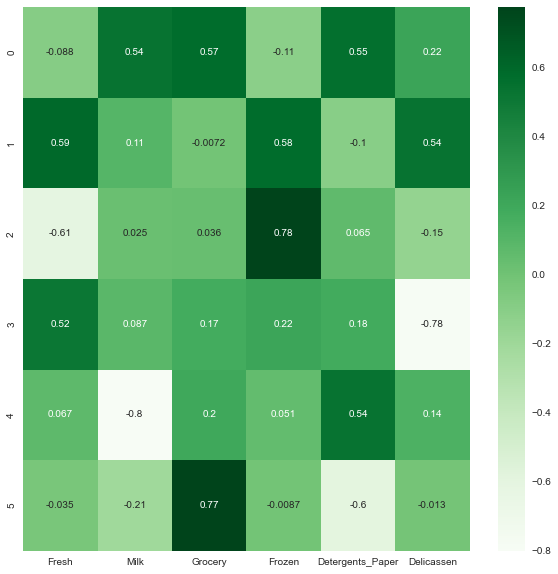

In [112]:
plt.figure(figsize = (10, 10))
sb.heatmap(df, cmap="Greens", annot=True)

The customers are divided into Retail, Hotel, Restaurant, Cafe

We can see that Component 0 has:
- strong positive correlation with Grocery (57%), Detergents_Paper(55%), and milk(54%)
- weak positive correlation (22%) with Delicassen
- very weak negative correlation with Fresh and weak negative correlation with Frozen (-11%)
This suggest that this compoenent might represent some sort of cafe that also ready to eat food such as sandwitches and pastry. 

Component 1 has:
- strong positive correlation (59%) with Fresh, Strong positive correlation with Frozen (58%) and Delicassen (54%)
- very weak positive correlation with milk (11%)
- and very weak negative correlation with Grocery and detergent_paper
This suggests that this component might be Restaurant that also has ready-to-serve food (not all fresh, 3/4 stars restaurant )

Component 2 has:
- Very strong positive correlation with frozen (78%)
- Strong negative correlation with Fresh (61%)
- weak negative correlation with Delicassen (15%)
- and weak positive correlation with everything else. 
This suggest that component 2 might represent retail stores that sell frozen items

Component 3 has:
- strong positive correlation with Fresh (52%)
- weak positive correlation with Detergent_Paper (18%) and Grocery (17%) and frozen (22%)
- Very strong negative correlation with Delicassen (-78%)
- and weak negative correlation with milk. 
This suggest that this component might represent some sort of  upscale hotel/ resturant  that mainly sells Fresh food. 


## **XGBoost**

### training model

Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [100]:

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [101]:
xg = xgb.XGBClassifier(eval_metric='rmse')
parameters = {
     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
    'eta': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
}


cv = GridSearchCV(xg, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'eta': 1, 'max_depth': 5}

0.659 (+/-0.005) for {'eta': 0, 'max_depth': 3}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 4}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 5}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 6}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 7}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 8}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 9}
0.659 (+/-0.005) for {'eta': 0, 'max_depth': 10}
0.902 (+/-0.036) for {'eta': 0.1, 'max_depth': 3}
0.909 (+/-0.055) for {'eta': 0.1, 'max_depth': 4}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 5}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 6}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 7}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 8}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 9}
0.902 (+/-0.044) for {'eta': 0.1, 'max_depth': 10}
0.909 (+/-0.055) for {'eta': 0.3, 'max_depth': 3}
0.902 (+/-0.055) for {'eta': 0.3, 'max_depth': 4}
0.905 (+/-0.047) for {'eta': 0.3, 'max_depth': 5}
0.905 (+/-0.041) for {'

In [103]:
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=1, eval_metric='rmse', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:

from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 264
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 264 training example : 80% training (211) 20% validation (53) in cross validation
train_sizes = [5, 15, 30, 60, 90, 120, 150, 180, 200, 211]
est=xgb.XGBClassifier(eta=1, eval_metric='rmse',max_depth=5)
train_sizes, train_scores, validation_scores = learning_curve(
estimator = est ,
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [105]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5      0.360000
15     0.026667
30    -0.000000
60    -0.000000
90    -0.000000
120   -0.000000
150   -0.000000
180   -0.000000
200   -0.000000
211   -0.000000
dtype: float64

 --------------------

Mean validation scores

 5      0.594920
15     0.132366
30     0.128665
60     0.132656
90     0.121190
120    0.098476
150    0.094702
180    0.121263
200    0.136357
211    0.087010
dtype: float64


(0.0, 0.75)

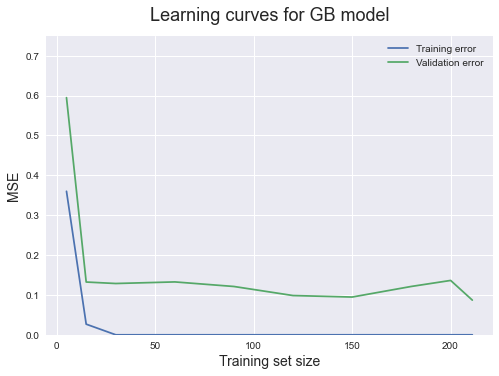

In [106]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for GB model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.75)

We can see that the training score for the small size is very high and decreases as the training size increases 

as the size of the training set increases the number of errors that model makes when making predictions for the validation set decreases, suggesting that model is improving at generalizing the data for the validation examples. 

since the two training and validation lines do not converge, increasing data points for training might be useful. 

Since both training and validation errors are low and the gap between the two is narrow, we can conclude that we have a model with low bias and quite low variance meaning our model has the optimum complexity. 

In [107]:
joblib.dump(cv.best_estimator_, 'XGB_model.pkl')

['XGB_model.pkl']

### Evaluating model

In [108]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

model = joblib.load('XGB_model.pkl')

In [109]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    latency = round((end - start)*1000, 1)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} --> Accuracy= {} | Precision= {} | Recall= {} | Latency= {}ms'.format(name, accuracy, precision, recall, latency ))

#### Evaluate the model on validation set:

In [110]:
 evaluate_model('XGB', model, val_features, val_labels)

XGB --> Accuracy= 0.92 | Precision= 0.89 | Recall= 0.902 | Latency= 4.0ms


The model performs with 92% accuracy. it also has high precision and Recall. with further exploration, we might find a better model for our purpose but this value are good enough for now. 

#### Evaluate the model on Test set:

In [111]:
 evaluate_model('XGB', model, te_features, te_labels)

XGB --> Accuracy= 0.909 | Precision= 0.893 | Recall= 0.923 | Latency= 3.0ms


by testing the model on the testing set we can see that the accuracy drops a little bit while precision and recall increase